In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import os
#to install matplotlib, and PIL

In [20]:
folder_name = "hellenistic_period"
resolution = 256

In [21]:
file_path="C:/Users/WS2/Desktop/kozmiksefer/disruption/data_set/"+folder_name+"_resized_"+str(resolution)
os.makedirs(file_path)

In [25]:
import glob
#path güncelle okunacak dosya
image_files = sorted(glob.glob("C:/Users/WS2/Desktop/kozmiksefer/disruption/data_set/"+folder_name+"/*.jpg"))
num_files = len(image_files)
print(num_files)

19


In [24]:
import numpy as np
aspect_ratios = np.zeros(num_files)

for i, file in enumerate(image_files):
  img = Image.open(file)
  width, height = img.size
  aspect_ratio = width / height
  aspect_ratios[i:i+1] = aspect_ratio
  if i%100 == 0:
    print(i, np.median(aspect_ratios[:i]))

0 nan


In [26]:
print(aspect_ratios)
print(aspect_ratios.mean())
print(np.median(aspect_ratios))
median_aspect_ratio = np.median(aspect_ratios)

[3.44766147 1.53688525 1.7167382  0.54817708 0.55538922 0.72916667
 0.66666667 0.71333333 2.39808153 0.49557061 0.41265475 0.52281473
 0.66736842 0.67909664 0.73866667 0.66761364 0.75       0.53172765
 0.75      ]
0.975137501189994
0.6790966386554622


<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\WS2\AppData\Local\Temp\ipykernel_9988\2325490178.py:10: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if mode is not "RGB":


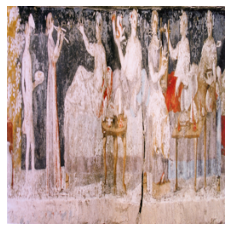

0 C:/Users/WS2/Desktop/kozmiksefer/disruption/data_set/hellenistic_period_resized_256\ancient-greek-painting_a-banquet-scene-from-a-macedonian-tomb-of-agios-athanasios-thessaloniki-greece--350.jpg


In [27]:

median_aspect_ratio = 1.2675

for i, file in enumerate(image_files):

  img = Image.open(file)
  width, height = img.size
  # print(width, height)
  aspect_ratio = width / height
  mode = img.mode
  if mode is not "RGB":
    continue
  # (left, upper, right, lower)
  # print(round(aspect_ratio, 3), round(median_aspect_ratio, 3))
  if (aspect_ratio > median_aspect_ratio):
    new_width = height * median_aspect_ratio
    delta = width - new_width
    img_cropped = img.crop(((delta/2, 0, width-delta/2, height)))
  else:
    new_height = width / median_aspect_ratio
    delta = height - new_height
    img_cropped = img.crop(((0, delta/2, width, height-delta/2)))

  img_resized = img.resize((resolution, resolution))
  #todo: change file path names
  save_path = file.replace(folder_name, folder_name + "_resized_" + str(resolution))
  img_resized.save(save_path)

  if i%100 == 0:
    imgplot = plt.imshow(img_resized)
    plt.axis("off")
    plt.show()
    print(i, save_path)

In [12]:
!ls /content/gdrive/MyDrive/impressionist_landscapes_resized_1024/*.jpg | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.
